# 1. Settings

In [1]:
import sys
from qutip_simulation_functions import *
import numpy as np
import qutip as qt


%matplotlib inline

In [2]:
nq = 10
g = qt.basis(nq,0)
e = qt.basis(nq,1)
f = qt.basis(nq, 2)
h = qt.basis(nq, 3)

psi0 = g

b = qt.destroy(nq)

qubit_x = b + b.dag()
qubit_y = -1j * (b - b.dag())
qubit_z = 2 * b.dag() * b - qt.qeye(nq)
g_state_projector = g * g.dag()
e_state_projector = e * e.dag()
f_state_projector = f * f.dag()

e_ops = [qubit_x, qubit_y, qubit_z, g_state_projector, e_state_projector, f_state_projector]
c_ops = []

In [3]:
h_bar = 1
alpha_mhz = 347.2
# qubit_frequency_ghz = 2 * np.pi * 5
alpha = 2 * np.pi * alpha_mhz / 10000 # 200 MHz Our time unit is 0.1ns -> 10GHz for the frequency.

transmon_hamiltonian = - h_bar * alpha / 2 * b.dag() * b.dag() * b * b

X Gate Fidelity:  0.9957262505411227


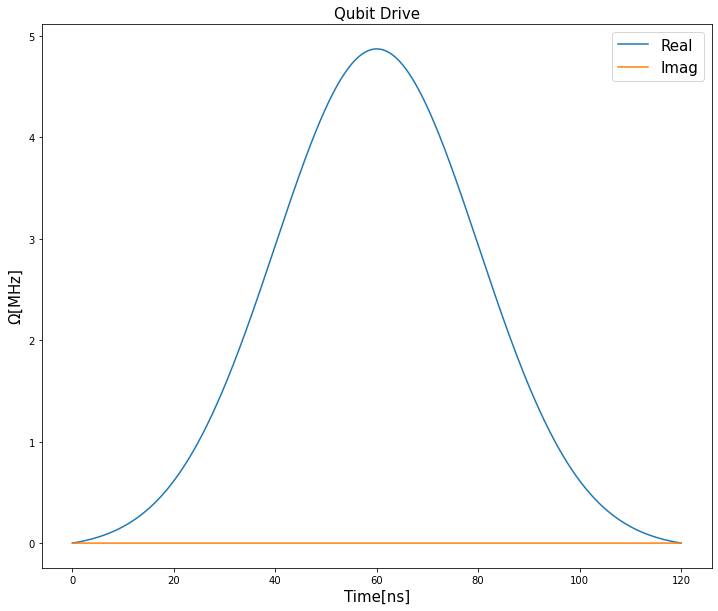

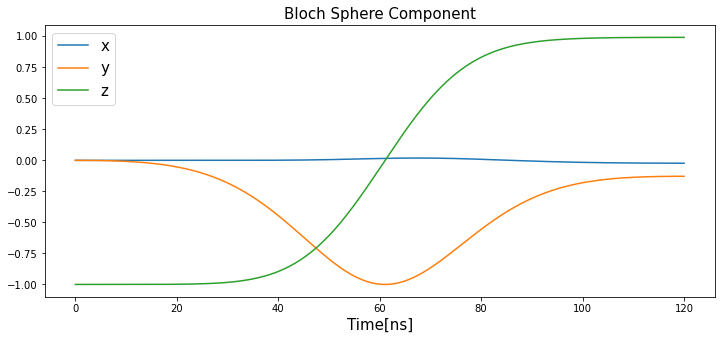

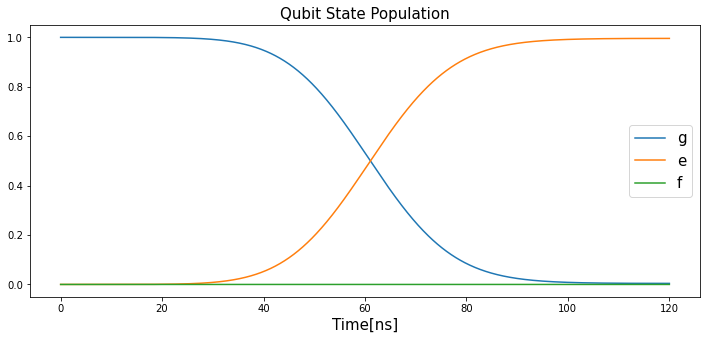

In [4]:
# 100ns

pulse_length_ns = 120
chop = 6

pulse_sigma_ns = pulse_length_ns/chop

tlist = np.linspace(0, pulse_length_ns*10, pulse_length_ns*10)
omega = pi_pulse_generator(pulse_sigma_ns, pulse_length_ns)
pi_hamiltonian = driven_hamiltonian(omega=omega, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(pi_hamiltonian,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plist = [res.expect[3], res.expect[4], res.expect[5]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)
plot_population(tlist=tlist, p_list=plist)
print("X Gate Fidelity: ", plist[1][-1])

X Gate Fidelity:  0.9954398940717192


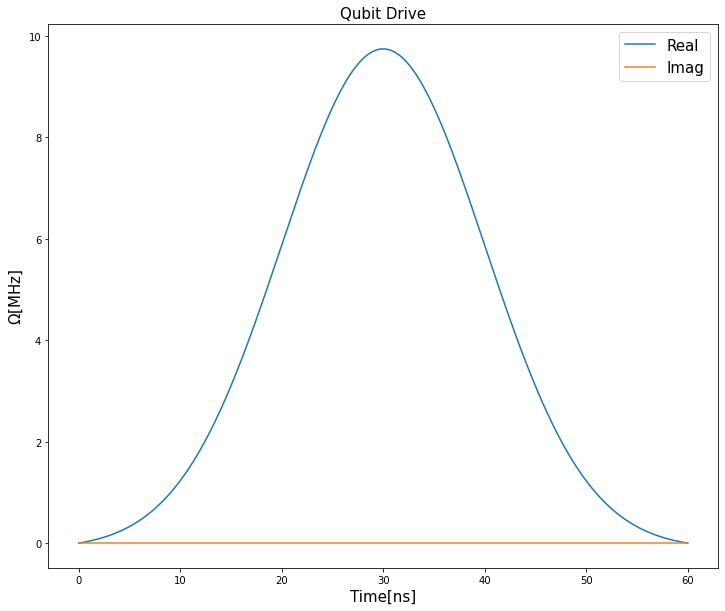

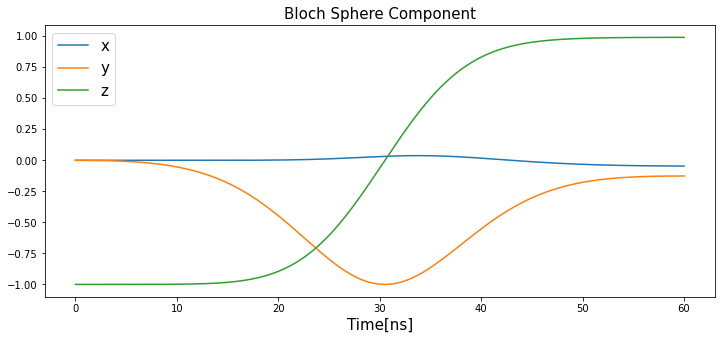

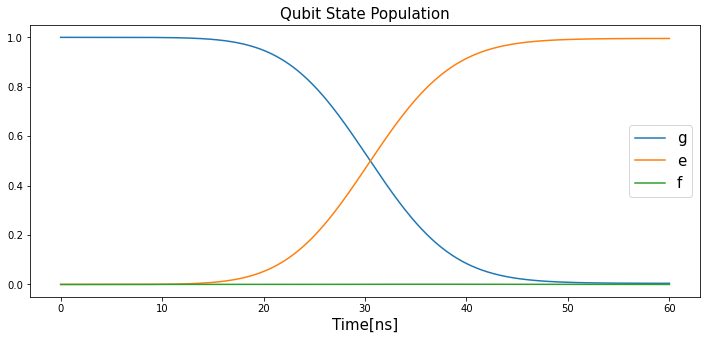

In [5]:
# 60ns

pulse_length_ns = 60
chop = 6

pulse_sigma_ns = pulse_length_ns/chop

tlist = np.linspace(0, pulse_length_ns*10, pulse_length_ns*10)
omega = pi_pulse_generator(pulse_sigma_ns, pulse_length_ns)
pi_hamiltonian = driven_hamiltonian(omega=omega, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(pi_hamiltonian,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plist = [res.expect[3], res.expect[4], res.expect[5]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)
plot_population(tlist=tlist, p_list=plist)
print("X Gate Fidelity: ", plist[1][-1])

X Gate Fidelity:  0.9939656967766162


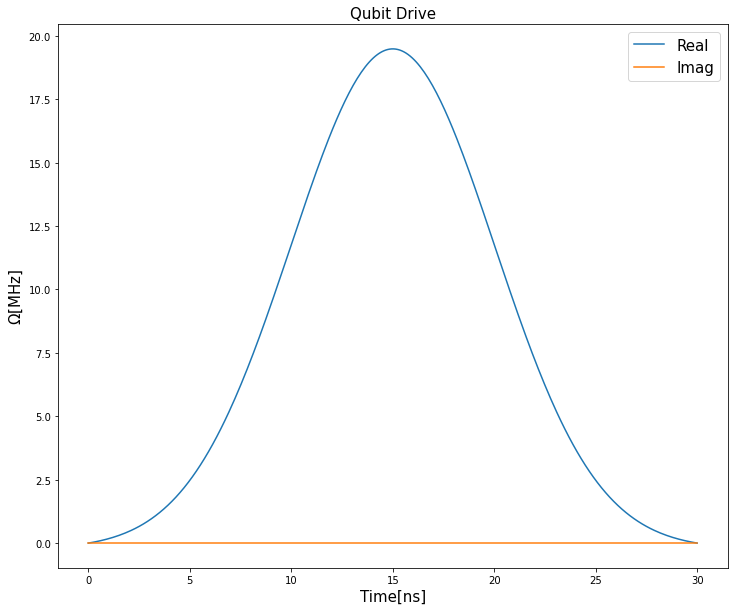

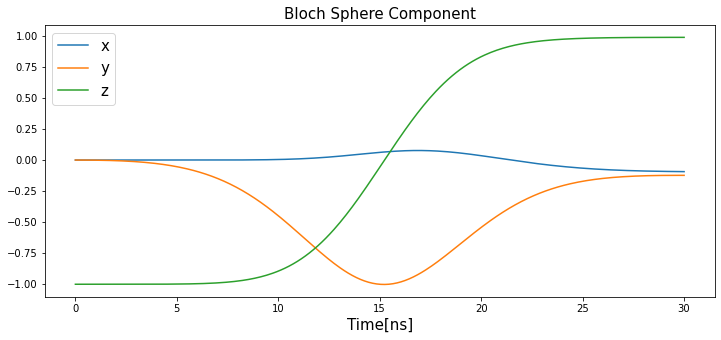

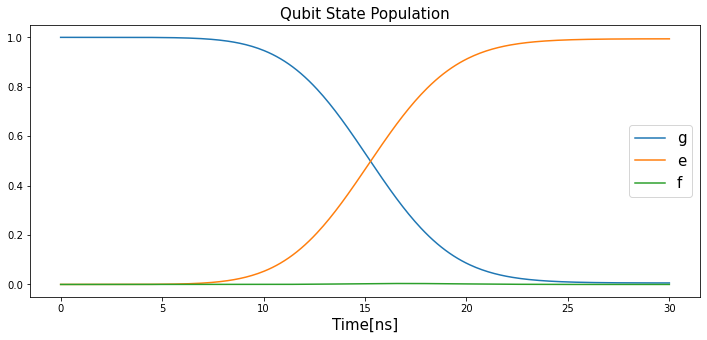

In [6]:
# 30ns

pulse_length_ns = 30
chop = 6

pulse_sigma_ns = pulse_length_ns/chop

tlist = np.linspace(0, pulse_length_ns*10, pulse_length_ns*10)
omega = pi_pulse_generator(pulse_sigma_ns, pulse_length_ns)
pi_hamiltonian = driven_hamiltonian(omega=omega, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(pi_hamiltonian,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plist = [res.expect[3], res.expect[4], res.expect[5]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)
plot_population(tlist=tlist, p_list=plist)
print("X Gate Fidelity: ", plist[1][-1])

X Gate Fidelity:  0.9912610198900831


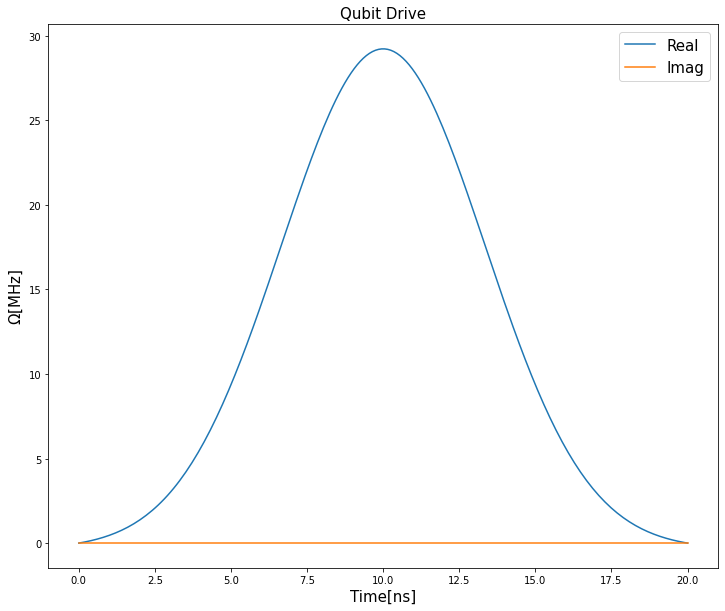

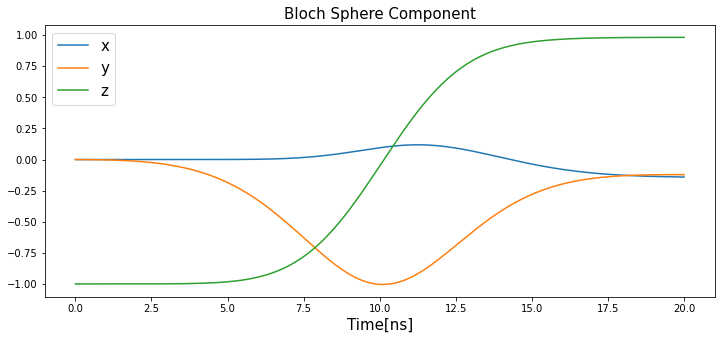

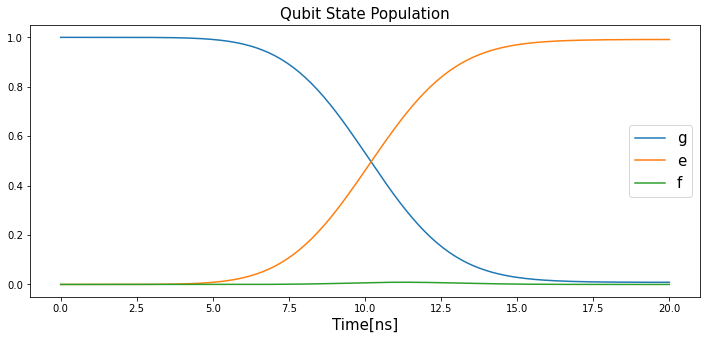

In [7]:
# 20ns

pulse_length_ns = 20
chop = 6

pulse_sigma_ns = pulse_length_ns/chop

tlist = np.linspace(0, pulse_length_ns*10, pulse_length_ns*10)
omega = pi_pulse_generator(pulse_sigma_ns, pulse_length_ns)
pi_hamiltonian = driven_hamiltonian(omega=omega, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(pi_hamiltonian,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plist = [res.expect[3], res.expect[4], res.expect[5]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)
plot_population(tlist=tlist, p_list=plist)
print("X Gate Fidelity: ", plist[1][-1])

X Gate Fidelity:  0.9749453765558861


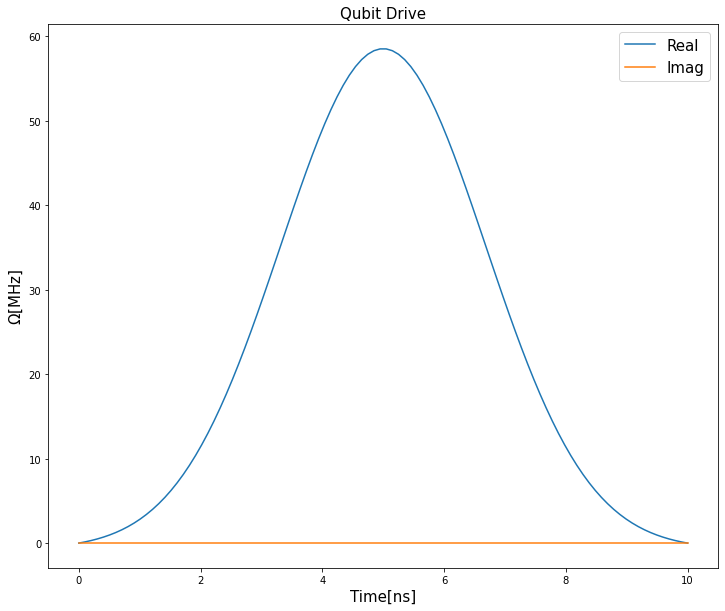

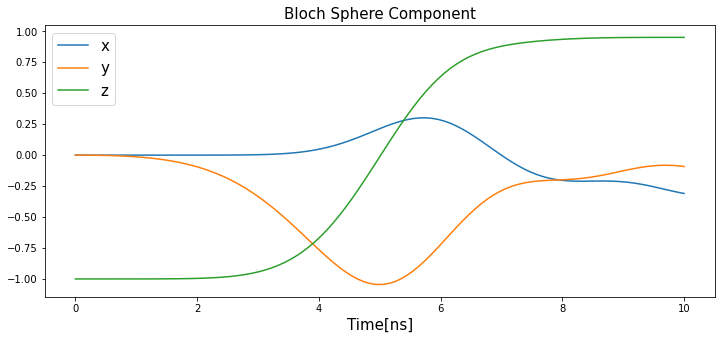

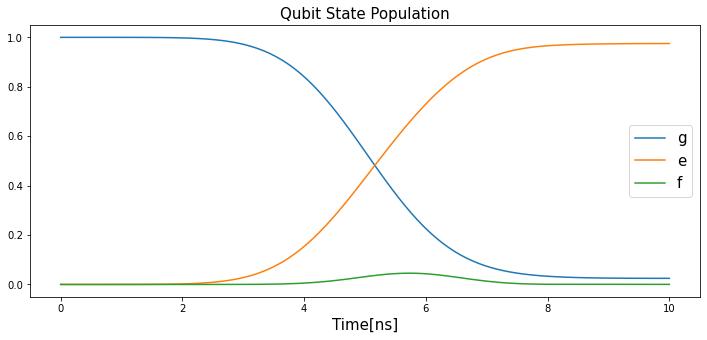

In [8]:
# 10ns

pulse_length_ns = 10
chop = 6

pulse_sigma_ns = pulse_length_ns/chop

tlist = np.linspace(0, pulse_length_ns*10, pulse_length_ns*10)
omega_100_ns = pi_pulse_generator(pulse_sigma_ns, pulse_length_ns)
H_100_ns = driven_hamiltonian(omega=omega_100_ns, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(H_100_ns,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plist = [res.expect[3], res.expect[4], res.expect[5]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)
plot_population(tlist=tlist, p_list=plist)
print("X Gate Fidelity: ", plist[1][-1])

X Gate Fidelity:  0.7976267185006991


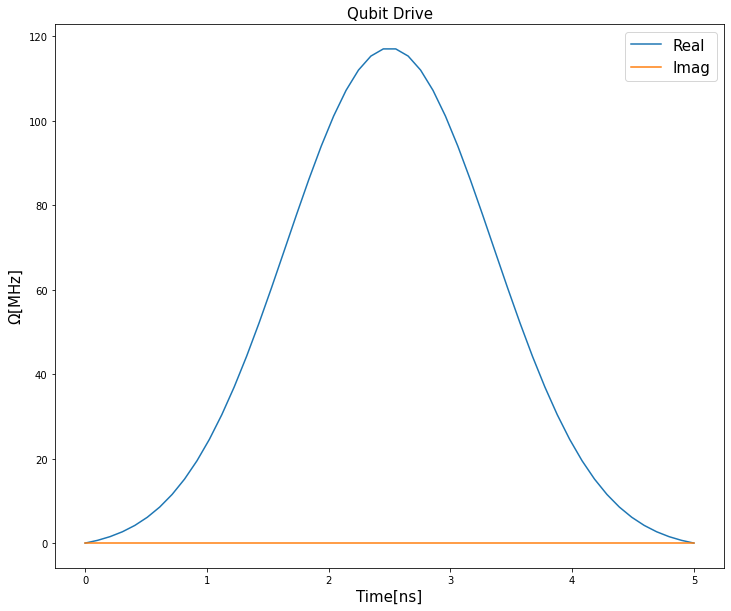

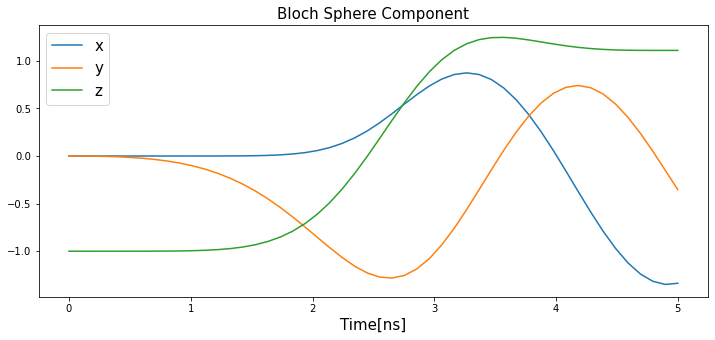

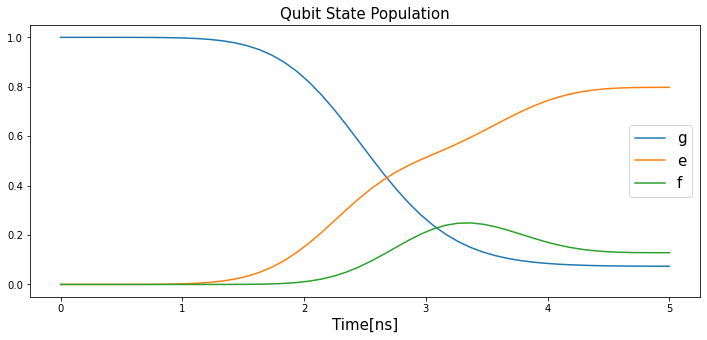

In [9]:
# 5ns

pulse_length_ns = 5
chop = 6

pulse_sigma_ns = pulse_length_ns/chop

tlist = np.linspace(0, pulse_length_ns*10, pulse_length_ns*10)
omega = pi_pulse_generator(pulse_sigma_ns, pulse_length_ns)
pi_hamiltonian = driven_hamiltonian(omega=omega, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(pi_hamiltonian,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plist = [res.expect[3], res.expect[4], res.expect[5]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)
plot_population(tlist=tlist, p_list=plist)
print("X Gate Fidelity: ", plist[1][-1])

X Gate Fidelity:  0.9096570334724124


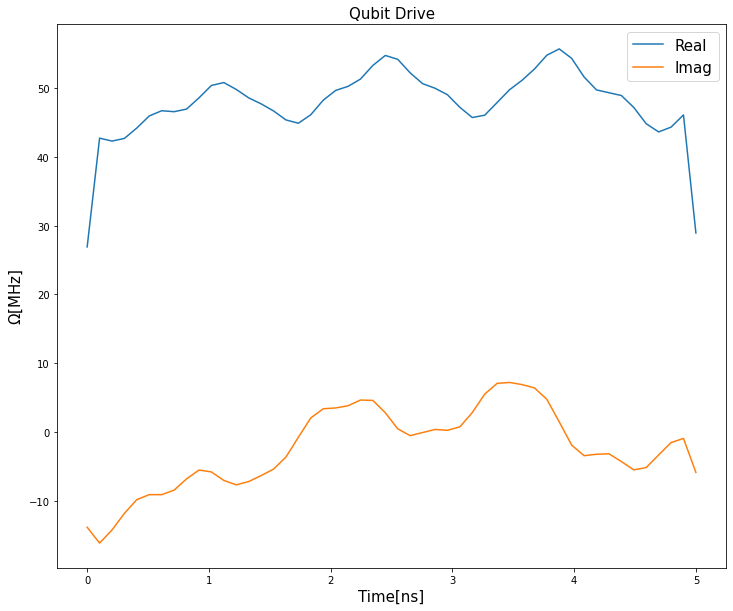

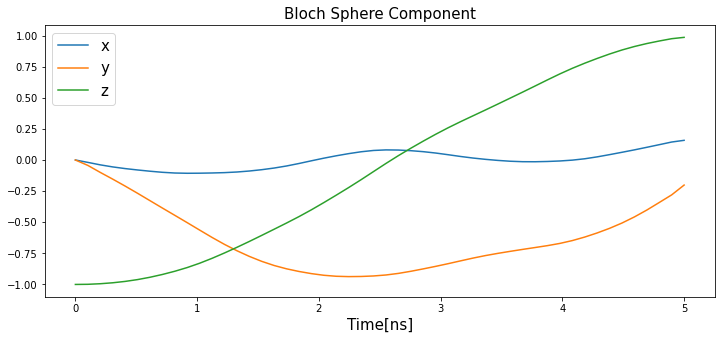

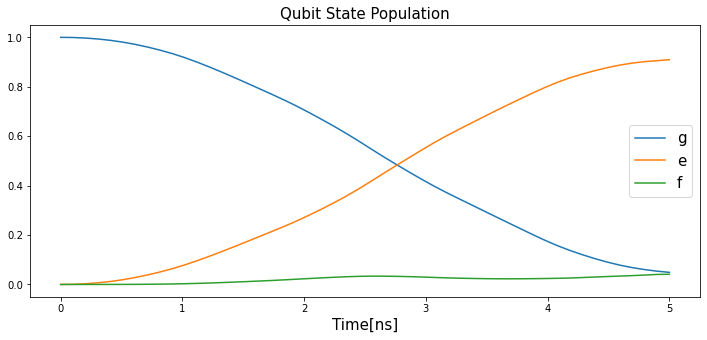

In [10]:
qoc_data = np.genfromtxt("my_data.csv", dtype=complex)
omega = qoc_data/5
tlist = np.linspace(0, len(omega), len(omega))
pi_hamiltonian = driven_hamiltonian(omega=omega, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(pi_hamiltonian,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plist = [res.expect[3], res.expect[4], res.expect[5]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)
plot_population(tlist=tlist, p_list=plist)
print("X Gate Fidelity: ", plist[1][-1])

In [11]:
def single_gaussian_fidelity(pulse_length_ns, chop):
    pulse_sigma_ns = pulse_length_ns/chop
    omega = pi_pulse_generator(pulse_sigma_ns, pulse_length_ns)
    pi_hamiltonian = driven_hamiltonian(omega=omega, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=False)
    tlist = np.linspace(0, pulse_length_ns*10, pulse_length_ns*10)
    res = qt.mesolve(pi_hamiltonian,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=False))
    return res.expect[4][-1]

In [12]:
single_gaussian_fidelity(5, 6)

0.7976267185006991

In [15]:
x_list = np.arange(1, 121, 1)
y_list = np.zeros(120)

In [27]:
for x in range(120):
    y_list[x] = single_gaussian_fidelity(x_list[x],6)

Text(0, 0.5, 'Fidelity')

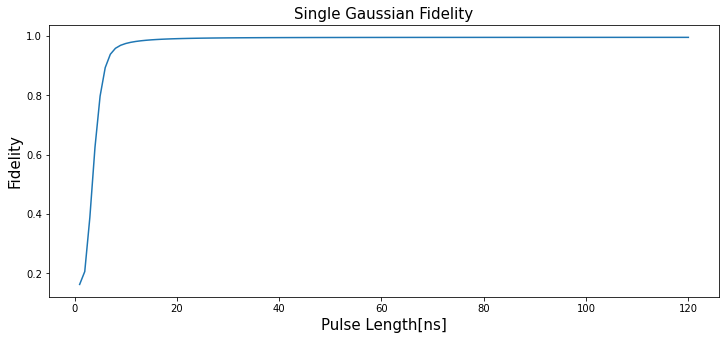

In [28]:
fig, ax = plt.subplots(figsize = (12, 5))
ax.plot(x_list, y_list)
ax.set_title("Single Gaussian Fidelity", fontsize=15)
ax.set_xlabel("Pulse Length[ns]", fontsize=15)
ax.set_ylabel("Fidelity", fontsize=15)

In [21]:
def gaussian_train_generator(sigma_ns, length_ns, n):
    """
    :param sigma_ns: Gaussian pulse length in ns unit
    :param length_ns: Gaussian pulse sigma in ns unit

    :return:
    pi-area guassian pulse in 0.1 ns unit. len(return) = 10 * length_ns
    """
    gauss_waveform = np.array([])
    unit = sp.gaussian(length_ns * 10, sigma_ns * 10)
    unit = unit - unit[0]
    for i in range(n):
        gauss_waveform = np.concatenate((gauss_waveform, unit))
    area = np.trapz(gauss_waveform)
    pi_pulse = np.pi * gauss_waveform / (area)

    return pi_pulse

X Gate Fidelity:  0.7976267185006991


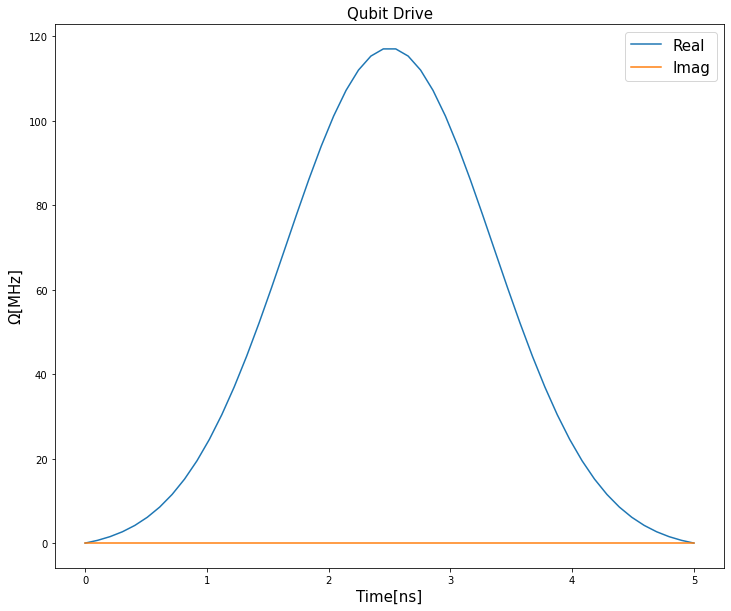

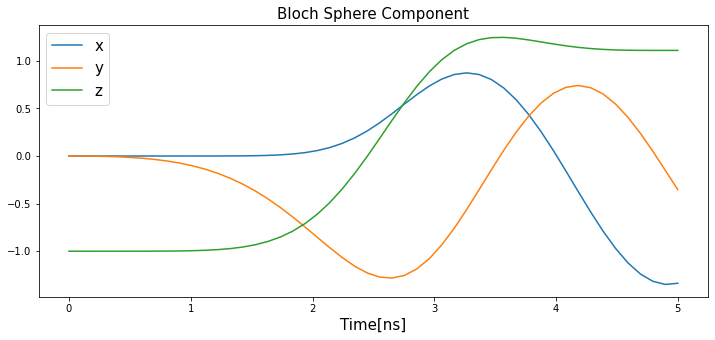

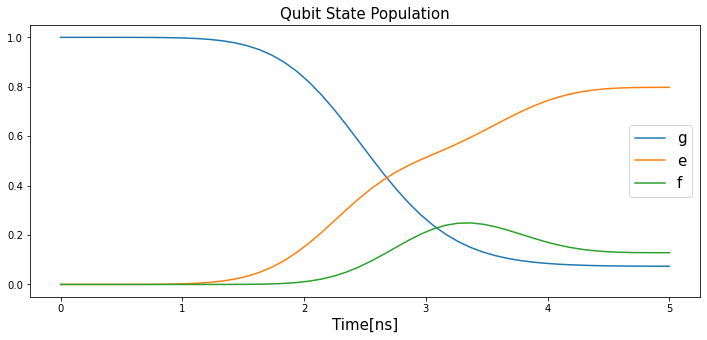

In [26]:
pulse_length_ns = 5
chop = 6

pulse_sigma_ns = pulse_length_ns/chop

tlist = np.linspace(0, pulse_length_ns*10, pulse_length_ns*10)
omega = gaussian_train_generator(pulse_sigma_ns, pulse_length_ns, 1)
pi_hamiltonian = driven_hamiltonian(omega=omega, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(pi_hamiltonian,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plist = [res.expect[3], res.expect[4], res.expect[5]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)
plot_population(tlist=tlist, p_list=plist)
print("X Gate Fidelity: ", plist[1][-1])

In [35]:
def drag_generator(sigma_ns, length_ns, alpha):
    gaussian = sp.gaussian(length_ns*10, sigma_ns*10)
    gaussian = gaussian - gaussian[0]
    omega_I = gaussian
    omega_Q = alpha * np.gradient(omega_I)
    omega = omega_I + 1j*omega_Q
    a_omega = np.sqrt(omega_I**2 + omega_Q**2)
    area = np.trapz(a_omega)
    omega = np.pi * omega / (area)
    return omega

In [37]:
drag_generator(10, 100, 0)

array([0.00000000e+00+0.j, 2.45029835e-09+0.j, 5.02067735e-09+0.j,
       7.71674124e-09+0.j, 1.05443415e-08+0.j, 1.35095869e-08+0.j,
       1.66188543e-08+0.j, 1.98787996e-08+0.j, 2.32963687e-08+0.j,
       2.68788101e-08+0.j, 3.06336865e-08+0.j, 3.45688880e-08+0.j,
       3.86926447e-08+0.j, 4.30135412e-08+0.j, 4.75405299e-08+0.j,
       5.22829466e-08+0.j, 5.72505249e-08+0.j, 6.24534126e-08+0.j,
       6.79021879e-08+0.j, 7.36078761e-08+0.j, 7.95819677e-08+0.j,
       8.58364361e-08+0.j, 9.23837566e-08+0.j, 9.92369260e-08+0.j,
       1.06409483e-07+0.j, 1.13915528e-07+0.j, 1.21769748e-07+0.j,
       1.29987433e-07+0.j, 1.38584506e-07+0.j, 1.47577541e-07+0.j,
       1.56983794e-07+0.j, 1.66821223e-07+0.j, 1.77108517e-07+0.j,
       1.87865123e-07+0.j, 1.99111275e-07+0.j, 2.10868024e-07+0.j,
       2.23157265e-07+0.j, 2.36001773e-07+0.j, 2.49425231e-07+0.j,
       2.63452266e-07+0.j, 2.78108483e-07+0.j, 2.93420500e-07+0.j,
       3.09415986e-07+0.j, 3.26123697e-07+0.j, 3.43573518e-07+

X Gate Fidelity:  0.48114091380475454


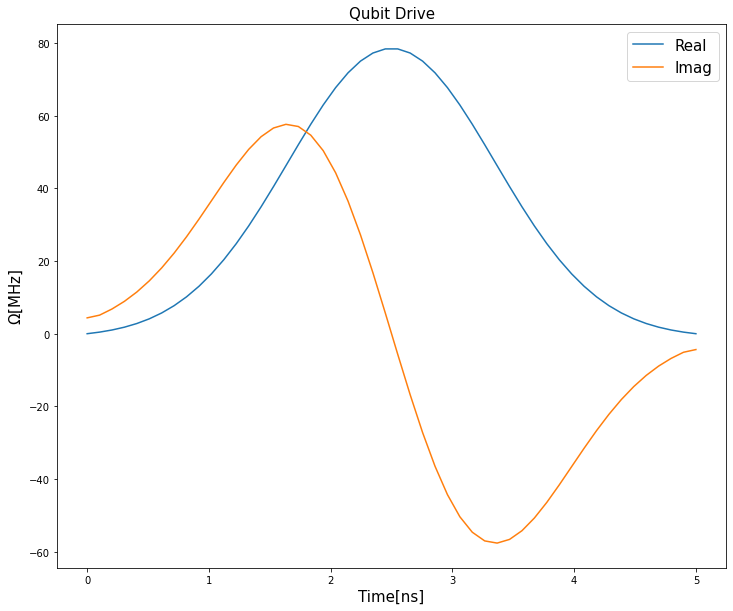

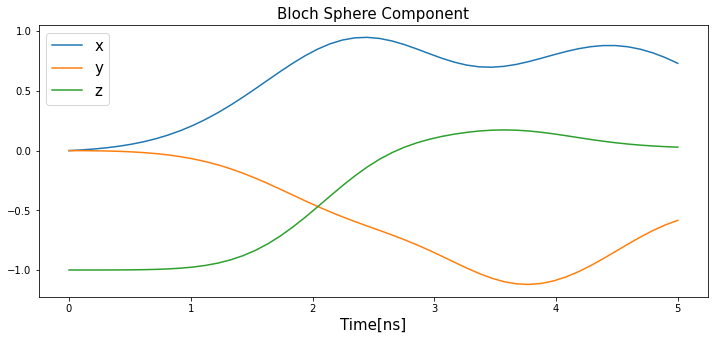

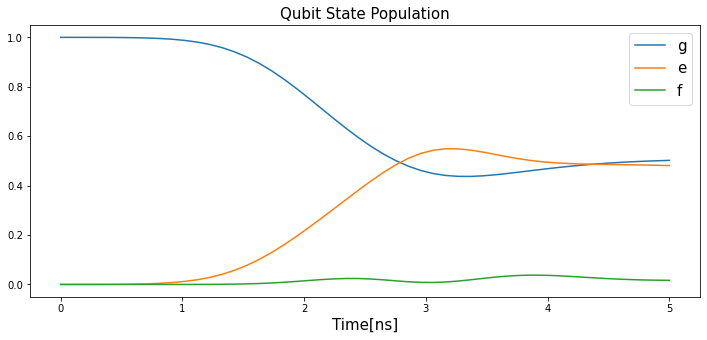

In [40]:
pulse_length_ns = 5
chop = 6
alpha = 10

pulse_sigma_ns = pulse_length_ns/chop

tlist = np.linspace(0, pulse_length_ns*10, pulse_length_ns*10)
omega = drag_generator(pulse_sigma_ns, pulse_length_ns, alpha)
pi_hamiltonian = driven_hamiltonian(omega=omega, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(pi_hamiltonian,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plist = [res.expect[3], res.expect[4], res.expect[5]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)
plot_population(tlist=tlist, p_list=plist)
print("X Gate Fidelity: ", plist[1][-1])

In [42]:
def drag_fidelity(pulse_length_ns, chop, alpha):
    pulse_sigma_ns = pulse_length_ns/chop
    omega = drag_generator(pulse_sigma_ns, pulse_length_ns, alpha)
    pi_hamiltonian = driven_hamiltonian(omega=omega, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=False)
    tlist = np.linspace(0, pulse_length_ns*10, pulse_length_ns*10)
    res = qt.mesolve(pi_hamiltonian,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=False))
    return res.expect[4][-1]

In [46]:
x_list = np.arange(1, 121, 30)
y_list = np.arange(-5, 60, 30)
z_list = np.zeros((len(x_list), len(y_list)))
for i in range(len(x_list)):
    for j in range(len(y_list)):
        print(i , " ", j)
        z_list[i][j] = drag_fidelity(x_list[i], 6, y_list[j])

0   0
0   1
0   2
1   0
1   1
1   2
2   0
2   1
2   2
3   0
3   1
3   2


In [50]:
z_list

array([[0.18677953, 0.01575866, 0.02786953],
       [0.97448569, 0.81311618, 0.4541891 ],
       [0.99034997, 0.94079433, 0.75999794],
       [0.99337063, 0.97025602, 0.87357971]])

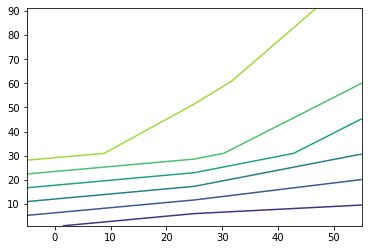

In [51]:
plt.contour(y_list, x_list, z_list)